In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data

![Opis obrazka](image.png)

In [2]:
ids = [1001,1002,1003,1010] * 4
revenues = [1,5,2,8,5,10,9,2,6,8,10,8,10,10,2,4]
months = [1,1,1,1,2,2,2,2] * 2
years = ([2021] * 8) + ([2022] * 8) 

In [3]:
df = pd.DataFrame({"ALDI_Store_ID":ids, "Revenue[mln]":revenues, "Month":months, "Year":years})

In [4]:
df

,ALDI_Store_ID,Revenue[mln],Month,Year
0,1001,1,1,2021
1,1002,5,1,2021
2,1003,2,1,2021
3,1010,8,1,2021
4,1001,5,2,2021
5,1002,10,2,2021
6,1003,9,2,2021
7,1010,2,2,2021
8,1001,6,1,2022
9,1002,8,1,2022


### The average revenue generated by the store

In [5]:
avg_revenue = df.groupby("ALDI_Store_ID")["Revenue[mln]"].mean()

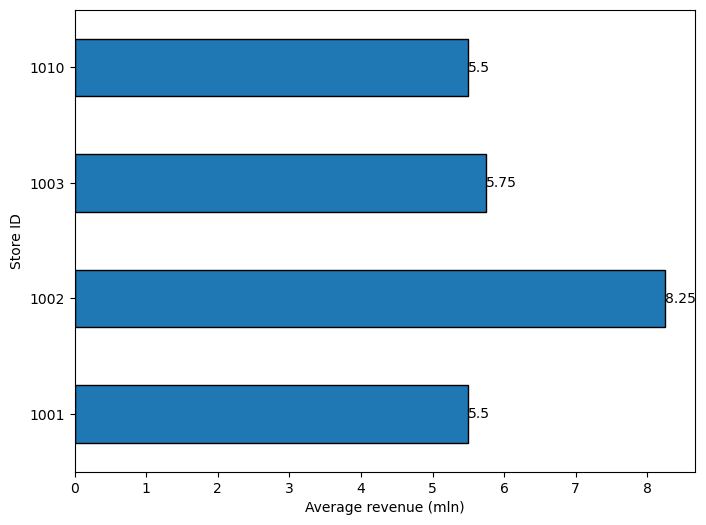

In [9]:
ax = avg_revenue.plot(kind="barh", edgecolor='black', figsize=(8, 6))

for index, value in enumerate(avg_revenue):
    ax.text(value, index, value, va='center')

plt.ylabel("Store ID")
plt.xlabel("Average revenue (mln)")

plt.show()

Shop ID 1002 stands out for its average monthly revenue, achieving a significantly better result than the others. 

### Average monthly revenue

In [60]:
avg_monthly = df.groupby(["Year", "Month"]).sum()["Revenue[mln]"].mean()
print(f"ALDI average monthly revenue is {avg_monthly} mln.")

ALDI average monthly revenue is 25.0 mln.


ALDI average monthly revenue is 25 mln.

#### Average monthly revenues in month

In [42]:
avg_monthly_by_month = df.groupby("Month")["Revenue[mln]"].mean()

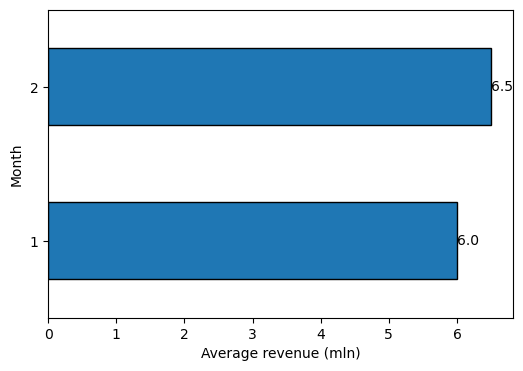

In [44]:
ax = avg_monthly_by_month.plot(kind="barh", edgecolor='black', figsize=(6, 4))

for index, value in enumerate(avg_monthly_by_month):
    ax.text(value, index, value, va='center')

plt.ylabel("Month")
plt.xlabel("Average revenue (mln)")

plt.show()

January achieves slightly better average revenues.

#### Average monthly revenues in year, month

In [10]:
avg_monthly_by_year_month = df.groupby(['Year', 'Month'])["Revenue[mln]"].mean()

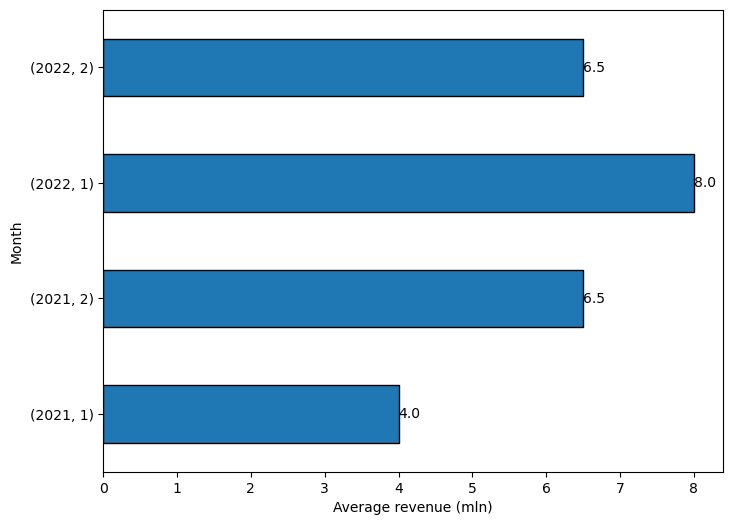

In [25]:
ax = avg_monthly_by_year_month.plot(kind="barh", edgecolor='black', figsize=(8, 6))

for index, value in enumerate(avg_monthly_by_year_month):
    ax.text(value, index, value, va='center')

plt.ylabel("Month")
plt.xlabel("Average revenue (mln)")

plt.show()

In January 2022, the average revenues  was the highest.  In January 2021, on the other hand, the average revenues was significantly below the overall average.

### Maximum annual revenue

In [32]:
max_ann_rev = df.groupby("Year")['Revenue[mln]'].sum().max()
print(f"Maximum annual revenue was {max_ann_rev}")

Maximum annual revenue was 58


In [33]:
df.groupby("Year")['Revenue[mln]'].sum()

Year
2021    42
2022    58
Name: Revenue[mln], dtype: int64

The maximum annual revenue was achieved in 2022 and was 58 million. 

### Determine in which month the total revenue was the lowest.

In [36]:
monthly_tot_revenue = df.groupby(['Year', 'Month'])['Revenue[mln]'].sum()
min_monthly_revenue = monthly_tot_revenue.idxmin()
print(f"The month with the lowest revenue {min_monthly_revenue[1]}-{min_monthly_revenue[0]}")

The month with the lowest revenue 1-2021


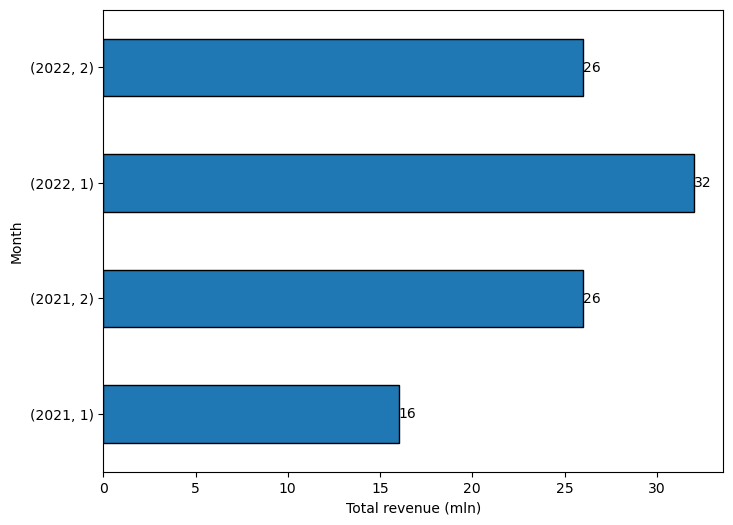

In [41]:
ax = monthly_tot_revenue.plot(kind="barh", edgecolor='black', figsize=(8, 6))

for index, value in enumerate(monthly_tot_revenue):
    ax.text(value, index, value, va='center')

plt.ylabel("Month")
plt.xlabel("Total revenue (mln)")

plt.show()

The lowest total revenue was achieved in January 2021.